In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from numpy.linalg import norm
from sklearn.metrics import r2_score

In [2]:
x = np.linspace(0,20).reshape(-1,1)
y = (-2 * x) + 1
data = np.hstack((x,y))


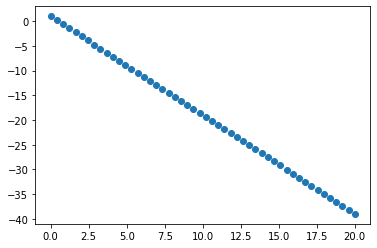

In [3]:
plt.scatter(x , y)

In [4]:
def hypo(theta , x):
    return np.dot(theta , x)

def gradient(theta , x , y):
    h = hypo(theta , x)
    return np.dot((h-y) , x.T)/x.shape[1]
        

def cost(theta , x , y):
    return np.sum((hypo(theta , x) - y)**2)/(2*len(x[0]))

def create_Batches(x , y , batch_size):
    num_of_batches = int(x.shape[1] / batch_size)
    m = num_of_batches * batch_size
    x_batches = np.hsplit(x[:,:m] , num_of_batches)
    y_batches = np.hsplit(y[0:m] , num_of_batches)
    
    if x.shape[1] % batch_size != 0 :
        x_batches.append(x[:,m:])
        y_batches.append(y[m:])
        
    return x_batches , y_batches

def prepare_Data(data):  
    num_of_columns = data.shape[1]
    num_of_rows = data.shape[0]
  

    x_train = data[: , 0:num_of_columns-1]              
    y_train = data[:,num_of_columns-1]
    ones = np.ones_like(y_train).reshape(-1,1)
    x_train = np.concatenate((ones , x_train) , axis = 1)
    x_train = x_train.T
    
    return x_train , y_train

def plot_cost_update(loss):
    plt.clf()
    plt.plot(loss)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("How the cost decreases")
    plt.show()
    
def plot_theta_update(theta0 , theta1 , loss):
    plt.clf()
    fig , ax = plt.subplots(1,2)
    ax[0].plot(theta0 , loss)
    ax[0].set(xlabel='theta 0', ylabel='cost')
    ax[1].plot(theta1 , loss)
    ax[1].set(xlabel='theta 1', ylabel='cost')

def plot_all_lines(data , theta0 , theta1):
    x_train , y_train = prepare_Data(data)
    plt.scatter(x_train[1] , y_train)
    plt.xlabel("x")
    plt.ylabel("y")
    for i in range(len(theta0_update)):
        th = [theta0_update[i] , theta1_update[i]]
        plt.plot(x_train[1] , hypo(th , x_train) , color ="r")
    plt.show()
    
def plot_best_line(data , theta):
    x_train , y_train = prepare_Data(data)
    plt.clf()
    plt.scatter(x_train[1] , y_train)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(x_train[1] , hypo(theta , x_train) , color ="r")
    plt.show()
    


## Momentum Implementation

In [5]:
def predict_momentum(data , batch_size , learning_rate , num_of_epochs , gamma ):
    
    x_train , y_train = prepare_Data(data)
    
    theta = np.zeros(x_train.shape[0])
    v = np.zeros(x_train.shape[0])
    theta0_update = [0]
    theta1_update = [0]
    cost_update = []
    for i in range(num_of_epochs+1):
        x_batches , y_batches = create_Batches(x_train , y_train , batch_size)
        for x_bat , y_bat in zip(x_batches , y_batches):        
            c = cost(theta , x_bat , y_bat)
            cost_update.append(c)
            grad = gradient( theta , x_bat , y_bat)
            ### Momentum Update
            v = gamma * v + learning_rate * grad
            theta = theta - v
            
            theta0_update.append(theta[0])
            theta1_update.append(theta[1]) 
        if (i>0):
            last = i* len(x_batches)
            current = (i-1) * len(x_batches)
            if (np.abs(cost_update[last] - cost_update[current]))<.0001 :
#           print(np.abs(cost_update[last] - cost_update[current]))
#           print(i)
                break
        if(norm(grad) < .0001):
            break
    c = cost(theta , x_bat , y_bat)
    cost_update.append(c)

    print("theta0 = {}  theta1={}  cost= {}".format(theta[0] , theta[1] , c))

    return theta , cost_update , theta0_update , theta1_update

## Nesterov Accelerated  GD (NAG) Implementation

In [ ]:
def predict_NAG(data , batch_size , learning_rate , num_of_epochs , gamma ):
    
    x_train , y_train = prepare_Data(data)
    
    theta = np.zeros(x_train.shape[0])
    v = np.zeros(x_train.shape[0])
    theta_temp = np.zeros(x_train.shape[0])
    
    theta0_update = [0]
    theta1_update = [0]
    cost_update = []
    for i in range(num_of_epochs+1):
        x_batches , y_batches = create_Batches(x_train , y_train , batch_size)
        for x_bat , y_bat in zip(x_batches , y_batches):        
            c = cost(theta , x_bat , y_bat)
            cost_update.append(c)
            ### NAG Update
            grad = gradient( theta_temp , x_bat , y_bat)
            theta_temp = theta_temp - (gamma * v)
            theta = theta_temp - (learning_rate * grad)
            v = (gamma*v) + (learning_rate * grad)
            
            theta0_update.append(theta[0])
            theta1_update.append(theta[1]) 
        if (i>0):
            last = i* len(x_batches)
            current = (i-1) * len(x_batches)
            if (np.abs(cost_update[last] - cost_update[current]))<.0001 :
#           print(np.abs(cost_update[last] - cost_update[current]))
#           print(i)
                break
        if(norm(grad) < .0001):
            break
    c = cost(theta , x_bat , y_bat)
    cost_update.append(c)

    print("theta0 = {}  theta1={}  cost= {}".format(theta[0] , theta[1] , c))

    return theta , cost_update , theta0_update , theta1_update

## Call the momentum vsersion

In [6]:
theta , cost_update , theta0_update , theta1_update = predict_momentum(data , batch_size=data.shape[0] , learning_rate=.0005 , num_of_epochs=300 , gamma = .7)

theta0 = -0.005523561693319658  theta1=-1.9252052483179096  cost= 0.13021590632988927


## R2 score

In [7]:
x_train , y_train = prepare_Data(data)
print(r2_score( y_train , hypo(theta,x_train)))

0.9981233589970104


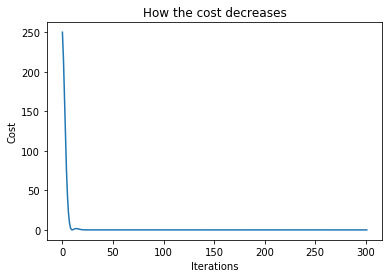

In [8]:
plot_cost_update(cost_update)

<Figure size 432x288 with 0 Axes>

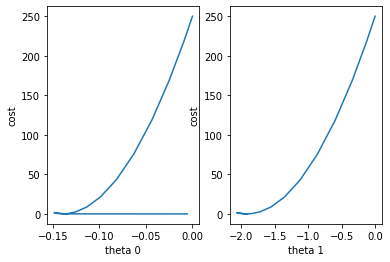

In [9]:
plot_theta_update(theta0_update , theta1_update , cost_update)

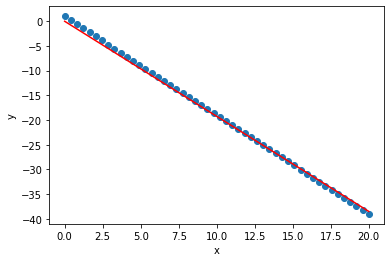

In [10]:
plot_best_line(data , theta)

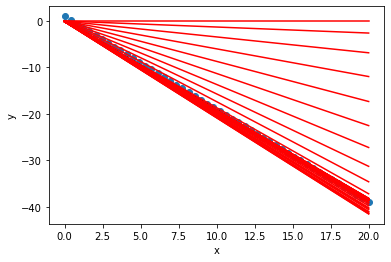

In [11]:
plot_all_lines(data , theta0_update , theta1_update)